<h1>Estimación de las emiciones de CO2 con una regrtesión lineal multiple.</h1>
<h3>Autor: <b>Jesús Méndez</b></h3>
<h3>Infomración de contacto</h3>
<ul>
    <li>Tel: <b>+52 55-8290-5977</b></li>
    <li>Instagram: <b>jesusdev.js</b></li>
    <li>Website: <b>https://jesusdev.netlify.app</b></li>
    <li>Github: <b>github.com/jesus105</b></li>
    <li>Fecha: <b>14/07/2020</b></li>
</ul>

<h3>Importamos las librerías a ocupar</h3>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

<h3>Descargamos los datos con los que entrenaremos a nuestro modelo</h3>

In [3]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-07-14 02:08:25--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Cargado certificado CA '/etc/ssl/certs/ca-certificates.crt'
Resolviendo s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Conectando con s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)[67.228.254.196]:443...conectado.
Petición HTTP enviada, esperando respuesta...200 OK
Longitud: 72629 (71K) [text/csv]
Grabando a: “FuelConsumption.csv”

FuelConsumption.csv 100%[===================>]  70.93K   407KB/s    en 0.2s    

2020-07-14 02:08:26 (407 KB/s) - “FuelConsumption.csv” guardado [72629/72629]



<h3>Ahora analizaremos los datos contenidos en el Dataset</h3>

In [5]:
dataset = pd.read_csv("FuelConsumption.csv")

<p>Miramos a la cabeza de nuestro dataset</p>

In [7]:
dataset.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<p>Seleccionamos algunos atributos los cuales ocuparemos para entrenar a nuestro modelo</p>

In [9]:
car = dataset[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
car.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


<p>Podemos gráficar cada una de las caracteristicas</p>

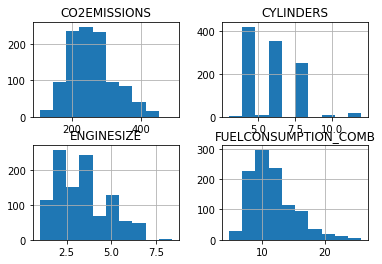

In [11]:
vistas = car[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
vistas.hist()
plt.show()

<h2>Procesamiento de los datos</h2>


<h3>Separación de los datos para entrenamiento y prueba</h3>
<p>Separamos los datos de "train" en entrenamiento y prueba en "test" para probar los algoritmos</p>
<p>Con ayuda de la librería NumPy nosotros de manera aleatoria tomamos un 80% De los datos para entrener a nuestro modelo y el otro 20% lo ocuparemos para ponerlo a prueba</p>

In [14]:
#Seleccionamos el 80% de datos de forma aleatoria así
random = np.random.rand(len(dataset)) < 0.8
#Los datos seleccionados se quedan en la siguiente variable
train = car[random]
#El 20% restante se queda en la variable de prueba
test = car[~random]

<p>Seguidamente definimos el algoritmo a utilizar que es el de LinearRegression.</p>

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

<p>Ahora debemos de definir las variables donde estarán almacenados nuestros datos de entrada y salida.</p>

In [16]:
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

<p>Como siguiente paso debemos de entrenar a nuestro modelo y mostrar sus resultados.</p>

In [28]:
regr.fit (x, y)
# Valores del vector W
print("W0 = "+str(regr.intercept_[0]))
print ('W1 = ' +  str(regr.coef_[0][0]))
print ('W2 = ' +  str(regr.coef_[0][1]))
print ('W3 = ' +  str(regr.coef_[0][2]))

W0 = 63.404694149875525
W1 = 9.520737369638566
W2 = 8.280202317882424
W3 = 9.769132482114616


<p>Por ultimo solo nos resta calificar la eficacia de nuestro modelo.</p>

In [31]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Diferencia de cuadrados: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explicación de la puntuación: 1 es una predicción perfecta.
print('Puntuación: %.2f' % regr.score(x, y))

Diferencia de cuadrados: 498.15
Puntuación: 0.86


<p>Ahora sabiendo que nuestro modelo tiene una presición del 86% predeciremos el valor de emisiones de CO2 al ambiente con nuestro programa.</p>

In [33]:
def emision(tamaño, cilindros, combustible):
    Y = regr.coef_[0][0]*tamaño+ regr.coef_[0][1]*cilindros + regr.coef_[0][2]*combustible + regr.intercept_[0]
    return Y

print("Las emisiones de C02 serán de: %.3f" % emision(3, 5, 10)) 


Las emisiones de C02 con una máquina de tamaño 3 serán de: 231.059
